In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_raw = cv2.imread('img.jpg')

In [3]:
type(img_raw)
img_raw.shape

(900, 900, 3)

In [4]:
# plt.imshow(img_raw)

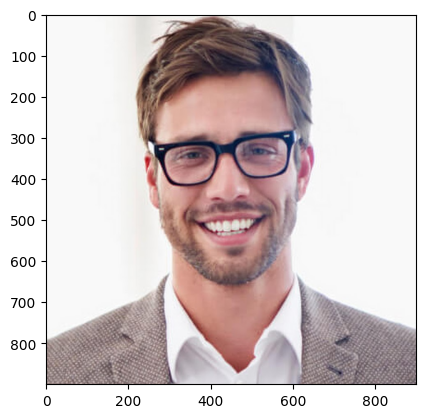

In [5]:
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
# import cv2
# img = cv2.imread('img.jpg')
# while True:
#     cv2.imshow('mandrill',img)
#     if cv2.waitKey(1) & 0xFF == 27:
#         break
# cv2.destroyAllWindows()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [8]:
image_blank = np.zeros(shape=(512,512,3),dtype=np.int16)

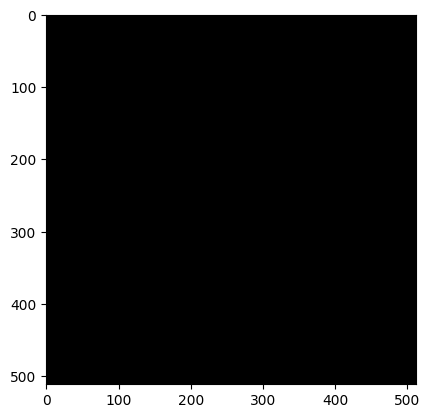

In [9]:
plt.imshow(image_blank)

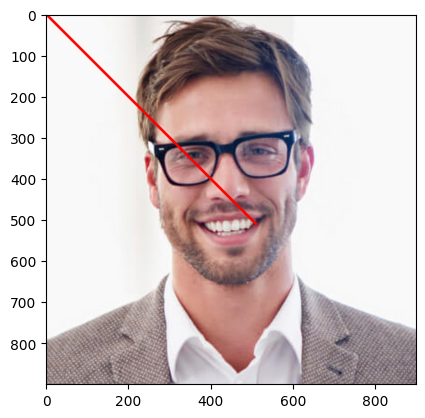

In [10]:
# cv2.shape(line, rectangle)(image,Pt1,Pt2,color,thickness)

line_red = cv2.line(img,(0,0),(511,511),(255,0,0),5)
plt.imshow(line_red)

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


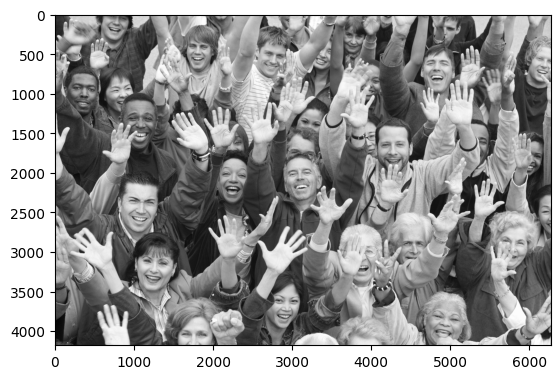

In [12]:
#Loading the image to be tested
test_image = cv2.imread('img3.jpg')
#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')
#Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

In [13]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [14]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# haar_cascade_face = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')
# haar_cascade_face = cv2.CascadeClassifier('haarcascade_smile.xml')

In [15]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);
# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  26


In [16]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 10)

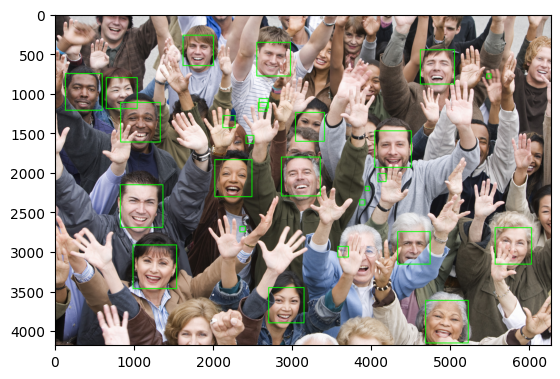

In [17]:
plt.imshow(convertToRGB(test_image))

In [21]:
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 10, 70)
    ret, mask = cv2.threshold(canny, 70, 255, cv2.THRESH_BINARY)
    cv2.imshow('Video feed', mask)
    
    if cv2.waitKey(1) == 13:
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
# Creating database 
# It captures images and stores them in datasets 
# folder under the folder name of sub_data 
import cv2, sys, numpy, os 
haar_file = 'haarcascade_frontalface_default.xml'

# All the faces data will be 
# present this folder 
datasets = 'datasets'


# These are sub data sets of folder, 
# for my faces I've used my name you can 
# change the label here 
sub_data = 'vivek'	

# path = os.path.join(datasets, sub_data) 
# if not os.path.isdir(path): 
	# os.mkdir(path) 

# defining the size of images 
# (width, height) = (130, 100)	 

#'0' is used for my webcam, 
# if you've any other camera 
# attached use '1' like this 
face_cascade = cv2.CascadeClassifier(haar_file) 
webcam = cv2.VideoCapture(0) 

# The program loops until it has 30 images of the face. 
count = 1
while count < 30: 
	(_, im) = webcam.read() 
	gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
	faces = face_cascade.detectMultiScale(gray, 1.3, 4) 
	for (x, y, w, h) in faces: 
		cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2) 
		face = gray[y:y + h, x:x + w] 
		face_resize = cv2.resize(face, (width, height)) 
		cv2.imwrite('% s/% s.png' % (path, count), face_resize) 
	count += 1
	
	cv2.imshow('OpenCV', im) 
	key = cv2.waitKey(10) 
	if key == 13: 
		break


In [3]:
import cv2

# Web kamerani ochish
cap = cv2.VideoCapture(0)

# Web kamerani ochib bo'lganini tekshirish
if not cap.isOpened():
    print("Web kamera topilmadi. Dastur to'xtatiladi.")
    exit()

# Face detection uchun modelni yuklash
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Kameradan kadrlarni olish
    ret, frame = cap.read()
    if not ret:
        print("Kameradan kadrlar olinmadi.")
        break

    # Kadrdagi yuzlar
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Yuzlarni belgilash
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Ekran chiqarish
    cv2.imshow('Face Detection', frame)

    # Dasturni to'xtatish uchun 'q' tugmasini kuzatish
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Qo'riqni tozalash va yopish
cap.release()
cv2.destroyAllWindows()
